In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'c:\Users\AISWARYA\Desktop\iti new\balanced_vasopressin - Copy.csv')

In [4]:
df.head()

,subject_id,urine_output_mean,creatinine_mean,on_vasopressin,vasopressin_dose_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,heart_rate_mean,sbp_mean,lactate_mean,age
0,14028443,679.500000,0.940000,1,2.020731,1.4,0.6,2.333333,Recovered,NaN,64.142857,NaN,1.616667,68
1,16692549,472.500000,2.100000,0,NaN,2.1,2.1,1.000000,Improving,NaN,79.440000,NaN,NaN,89
2,14871009,2020.402299,0.705172,1,32.013333,0.5,0.7,0.714286,Worsening,510.628742,84.228883,111.873494,1.257143,87
3,19688253,753.000000,1.571429,1,28.093448,1.2,2.1,0.571429,Worsening,75.802083,97.413043,99.802083,3.866667,73
4,16006352,487.127886,2.080284,1,28.651146,2.7,2.1,1.285714,Recovered,63.977778,72.641026,112.137037,1.993750,76


In [5]:
vaso_df = df[df['on_vasopressin'] == 1].copy()
print('Rows with on_vasopressin == 1:', vaso_df.shape[0])
vaso_df.head()

Rows with on_vasopressin == 1: 4069


,subject_id,urine_output_mean,creatinine_mean,on_vasopressin,vasopressin_dose_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,heart_rate_mean,sbp_mean,lactate_mean,age
0,14028443,679.500000,0.940000,1,2.020731,1.4,0.6,2.333333,Recovered,NaN,64.142857,NaN,1.616667,68
2,14871009,2020.402299,0.705172,1,32.013333,0.5,0.7,0.714286,Worsening,510.628742,84.228883,111.873494,1.257143,87
3,19688253,753.000000,1.571429,1,28.093448,1.2,2.1,0.571429,Worsening,75.802083,97.413043,99.802083,3.866667,73
4,16006352,487.127886,2.080284,1,28.651146,2.7,2.1,1.285714,Recovered,63.977778,72.641026,112.137037,1.993750,76
8,16794039,123.555556,3.121053,1,77.759999,3.6,5.2,0.692308,Worsening,76.103286,79.298319,104.046948,3.428000,60


In [6]:
nan_counts = vaso_df.isna().sum()
print("NaN counts per column:")
print(nan_counts)
nan_counts_df = nan_counts.to_frame(name='nan_count')
nan_counts_df

NaN counts per column:
subject_id                 0
urine_output_mean          0
creatinine_mean            0
on_vasopressin             0
vasopressin_dose_mean      0
first_creat                0
last_creat                 0
recovery_ratio             0
recovery_class             0
map_mean                 443
heart_rate_mean            0
sbp_mean                 457
lactate_mean               4
age                        0
dtype: int64


,nan_count
subject_id,0
urine_output_mean,0
creatinine_mean,0
on_vasopressin,0
vasopressin_dose_mean,0
first_creat,0
last_creat,0
recovery_ratio,0
recovery_class,0
map_mean,443


In [7]:
subset = [
    'subject_id', 'urine_output_mean', 'creatinine_mean', 'on_vasopressin',
    'vasopressin_dose_mean', 'first_creat', 'last_creat', 'recovery_ratio',
    'recovery_class', 'map_mean', 'heart_rate_mean', 'sbp_mean', 'lactate_mean', 'age'
]

original_rows = vaso_df.shape[0]
cleaned_df = vaso_df.dropna(subset=subset).copy()
cleaned_rows = cleaned_df.shape[0]
print(f"Original rows (on_vasopressin==1): {original_rows}")
print(f"Rows after dropping NaNs in specified columns: {cleaned_rows}")
print(f"Rows removed: {original_rows - cleaned_rows}")

print('\nDescriptive statistics (numeric columns):')
cleaned_df.describe()
print('\nRemaining NaN counts in subset columns:')
print(cleaned_df[subset].isna().sum())

Original rows (on_vasopressin==1): 4069
Rows after dropping NaNs in specified columns: 3602
Rows removed: 467

Descriptive statistics (numeric columns):

Remaining NaN counts in subset columns:
subject_id               0
urine_output_mean        0
creatinine_mean          0
on_vasopressin           0
vasopressin_dose_mean    0
first_creat              0
last_creat               0
recovery_ratio           0
recovery_class           0
map_mean                 0
heart_rate_mean          0
sbp_mean                 0
lactate_mean             0
age                      0
dtype: int64


In [8]:
if 'on_vasopressin' in cleaned_df.columns:
    cleaned_df = cleaned_df.drop(columns=['on_vasopressin'])
print('Current columns (sample):')
print(cleaned_df.columns.tolist())
print('\nRecovery class labels and counts:')
print(cleaned_df['recovery_class'].value_counts(dropna=False))
print('\nUnique recovery_class labels:')
print(sorted(cleaned_df['recovery_class'].dropna().unique()))
cleaned_df.head()

Current columns (sample):
['subject_id', 'urine_output_mean', 'creatinine_mean', 'vasopressin_dose_mean', 'first_creat', 'last_creat', 'recovery_ratio', 'recovery_class', 'map_mean', 'heart_rate_mean', 'sbp_mean', 'lactate_mean', 'age']

Recovery class labels and counts:
recovery_class
Worsening    1386
Improving    1208
Recovered    1008
Name: count, dtype: int64

Unique recovery_class labels:
['Improving', 'Recovered', 'Worsening']


,subject_id,urine_output_mean,creatinine_mean,vasopressin_dose_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,heart_rate_mean,sbp_mean,lactate_mean,age
2,14871009,2020.402299,0.705172,32.013333,0.5,0.7,0.714286,Worsening,510.628742,84.228883,111.873494,1.257143,87
3,19688253,753.000000,1.571429,28.093448,1.2,2.1,0.571429,Worsening,75.802083,97.413043,99.802083,3.866667,73
4,16006352,487.127886,2.080284,28.651146,2.7,2.1,1.285714,Recovered,63.977778,72.641026,112.137037,1.993750,76
8,16794039,123.555556,3.121053,77.759999,3.6,5.2,0.692308,Worsening,76.103286,79.298319,104.046948,3.428000,60
10,14771014,914.368421,0.918421,21.440000,1.0,0.8,1.250000,Recovered,76.666667,105.099415,107.504673,1.088889,65


Label counts after combining:
label
Improving_Recovered    2216
Worsening              1386
Name: count, dtype: int64


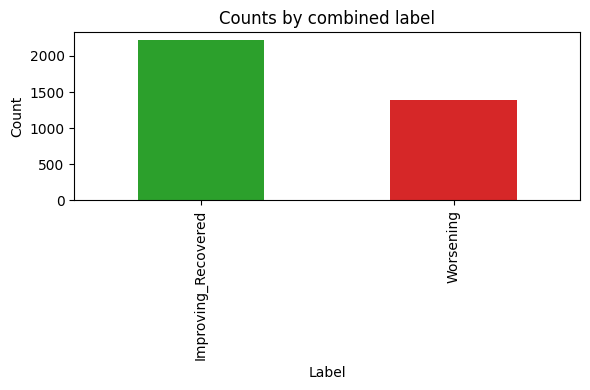

,count
label,
Improving_Recovered,2216
Worsening,1386


In [9]:
mapping = {'Improving': 'Improving_Recovered', 'Recovered': 'Improving_Recovered', 'Worsening': 'Worsening'}
cleaned_df['label'] = cleaned_df['recovery_class'].map(mapping).fillna('Other')
label_counts = cleaned_df['label'].value_counts(dropna=False)
print('Label counts after combining:')
print(label_counts)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['tab:green' if l=='Improving_Recovered' else 'tab:red' if l=='Worsening' else 'tab:gray'
                                     for l in label_counts.index])
plt.title('Counts by combined label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
label_counts.to_frame(name='count')

In [10]:
min_count = cleaned_df['label'].value_counts().min()
print('Target per-class count (downsample size):', min_count)
balanced_parts = []
for lab, grp in cleaned_df.groupby('label'):
    if len(grp) > min_count:
        balanced_parts.append(grp.sample(n=min_count, random_state=42))
    else:
        balanced_parts.append(grp)
balanced_df = pd.concat(balanced_parts).sample(frac=1, random_state=42).reset_index(drop=True)
print('\nCounts after balancing:')
print(balanced_df['label'].value_counts())
print('\nBalanced dataframe shape:', balanced_df.shape)
print('\nDescriptive statistics (numeric columns) of balanced_df:')
balanced_df.describe()
balanced_df.head()

Target per-class count (downsample size): 1386

Counts after balancing:
label
Improving_Recovered    1386
Worsening              1386
Name: count, dtype: int64

Balanced dataframe shape: (2772, 14)

Descriptive statistics (numeric columns) of balanced_df:


,subject_id,urine_output_mean,creatinine_mean,vasopressin_dose_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,heart_rate_mean,sbp_mean,lactate_mean,age,label
0,10033740,3465.454545,1.175000,14.801387,1.1,1.1,1.000000,Improving,70.854237,79.088496,108.023729,2.166667,76,Improving_Recovered
1,14378086,106.666667,2.497222,39.893332,1.5,1.6,0.937500,Improving,74.378049,100.184834,107.659091,6.775000,68,Improving_Recovered
2,10653347,820.777778,1.786667,46.507083,1.1,3.1,0.354839,Worsening,73.918367,89.949074,110.857143,1.926087,52,Worsening
3,18687772,1063.467290,2.391244,30.858799,0.8,2.9,0.275862,Worsening,75.543478,94.988532,119.424242,2.071429,59,Worsening
4,13191989,1367.041667,1.082884,53.863997,0.5,1.4,0.357143,Worsening,83.741636,94.784141,111.830882,9.942857,23,Worsening


In [11]:
drop_cols = ['vasopressin_dose_mean', 'heart_rate_mean']
removed = []
for c in drop_cols:
    if c in balanced_df.columns:
        balanced_df.drop(columns=[c], inplace=True)
        removed.append(c)

print('Dropped columns (present and removed):', removed)
if 'first_creat' in balanced_df.columns and 'last_creat' in balanced_df.columns:
    balanced_df['creatinine_change'] = balanced_df['first_creat'] - balanced_df['last_creat']
    print('Created feature: creatinine_change')
else:
    print('Could not create creatinine_change - required columns missing')

print('New balanced_df shape:', balanced_df.shape)
print('Remaining columns:', balanced_df.columns.tolist())
if 'creatinine_change' in balanced_df.columns:
    print('\ncreatinine_change stats:')
    print(balanced_df['creatinine_change'].describe())
    
balanced_df.head()

Dropped columns (present and removed): ['vasopressin_dose_mean', 'heart_rate_mean']
Created feature: creatinine_change
New balanced_df shape: (2772, 13)
Remaining columns: ['subject_id', 'urine_output_mean', 'creatinine_mean', 'first_creat', 'last_creat', 'recovery_ratio', 'recovery_class', 'map_mean', 'sbp_mean', 'lactate_mean', 'age', 'label', 'creatinine_change']

creatinine_change stats:
count    2772.000000
mean       -0.286039
std         1.602077
min        -8.200000
25%        -0.800000
50%        -0.100000
75%         0.200000
max        14.700000
Name: creatinine_change, dtype: float64


,subject_id,urine_output_mean,creatinine_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,sbp_mean,lactate_mean,age,label,creatinine_change
0,10033740,3465.454545,1.175000,1.1,1.1,1.000000,Improving,70.854237,108.023729,2.166667,76,Improving_Recovered,0.0
1,14378086,106.666667,2.497222,1.5,1.6,0.937500,Improving,74.378049,107.659091,6.775000,68,Improving_Recovered,-0.1
2,10653347,820.777778,1.786667,1.1,3.1,0.354839,Worsening,73.918367,110.857143,1.926087,52,Worsening,-2.0
3,18687772,1063.467290,2.391244,0.8,2.9,0.275862,Worsening,75.543478,119.424242,2.071429,59,Worsening,-2.1
4,13191989,1367.041667,1.082884,0.5,1.4,0.357143,Worsening,83.741636,111.830882,9.942857,23,Worsening,-0.9


In [12]:
balanced_df.to_csv("balanced_df_updated.csv", index=False)
print("Saved as balanced_df_updated.csv")


Saved as balanced_df_updated.csv


Columns after dropping subject_id (sample):
['urine_output_mean', 'creatinine_mean', 'first_creat', 'last_creat', 'recovery_ratio', 'recovery_class', 'map_mean', 'sbp_mean', 'lactate_mean', 'age', 'label', 'creatinine_change']

Pearson correlation of numeric features with label (Improving_Recovered=1):
creatinine_change    0.595632
recovery_ratio       0.481546
first_creat          0.203309
urine_output_mean    0.127892
sbp_mean             0.095469
map_mean             0.045323
lactate_mean        -0.020799
age                 -0.055433
creatinine_mean     -0.140484
last_creat          -0.420362
Name: label_num, dtype: float64


C:\Users\AISWARYA\AppData\Local\Temp\ipykernel_10864\980134269.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_label.values, y=corr_with_label.index, palette='vlag')


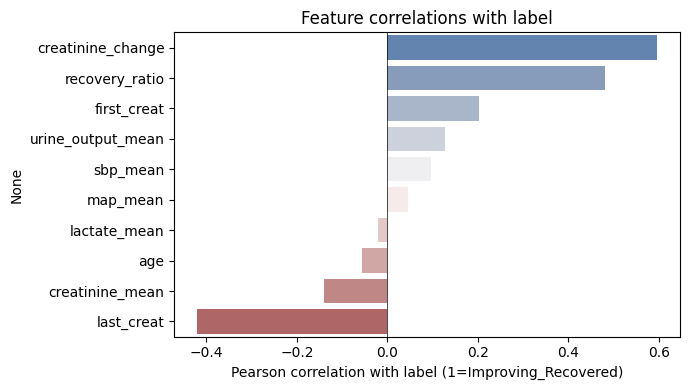

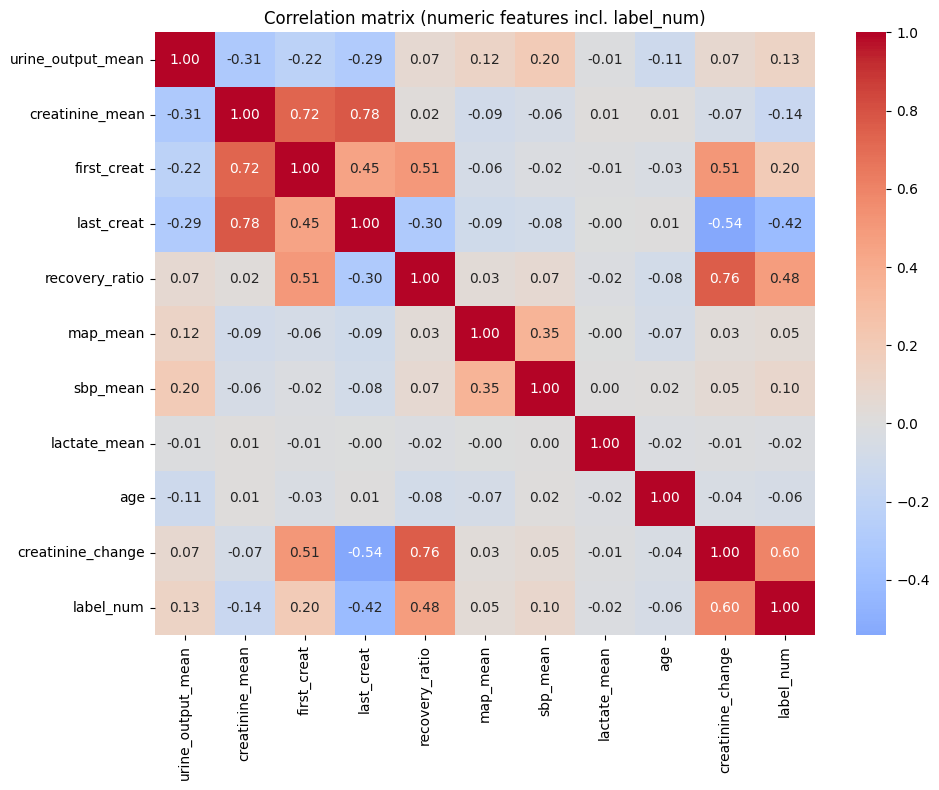

,corr_with_label
creatinine_change,0.595632
recovery_ratio,0.481546
first_creat,0.203309
urine_output_mean,0.127892
sbp_mean,0.095469
map_mean,0.045323
lactate_mean,-0.020799
age,-0.055433
creatinine_mean,-0.140484
last_creat,-0.420362


In [13]:
if 'subject_id' in balanced_df.columns:
    balanced_df = balanced_df.drop(columns=['subject_id'])
print('Columns after dropping subject_id (sample):')
print(balanced_df.columns.tolist())
label_map = {'Improving_Recovered': 1, 'Worsening': 0}
balanced_df['label_num'] = balanced_df['label'].map(label_map)
numeric = balanced_df.select_dtypes(include=[np.number])
corr_with_label = numeric.corr()['label_num'].drop('label_num').sort_values(ascending=False)
print('\nPearson correlation of numeric features with label (Improving_Recovered=1):')
print(corr_with_label)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, max(4, 0.4 * len(corr_with_label))))
sns.barplot(x=corr_with_label.values, y=corr_with_label.index, palette='vlag')
plt.xlabel('Pearson correlation with label (1=Improving_Recovered)')
plt.title('Feature correlations with label')
plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,8))
cm = numeric.corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric features incl. label_num)')
plt.tight_layout()
plt.show()
corr_with_label.to_frame(name='corr_with_label')

Dropped columns: ['recovery_ratio', 'creatinine_change', 'last_creat']


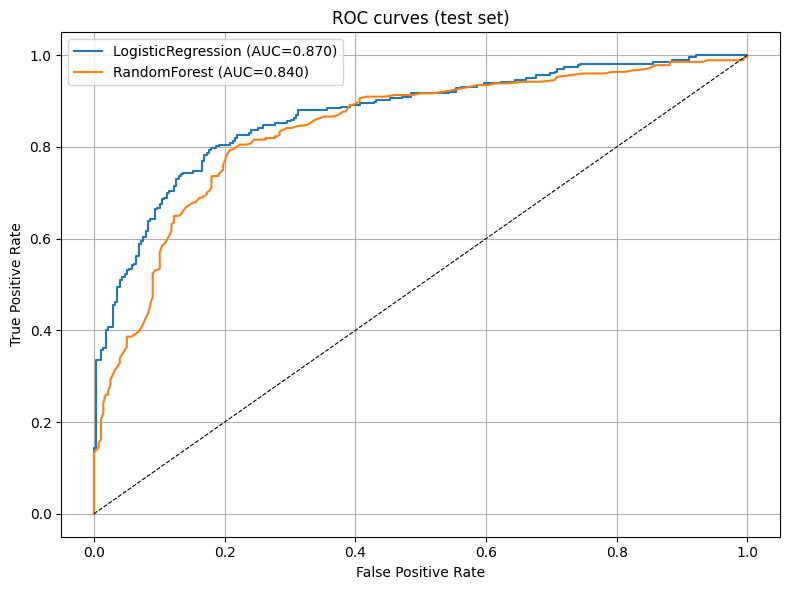

Evaluation metrics on test set:
                    accuracy  precision    recall        f1       auc
model                                                                
LogisticRegression  0.798198   0.789474  0.812274  0.800712  0.870179
RandomForest        0.785586   0.792593  0.772563  0.782450  0.839571

LogisticRegression classification report:
              precision    recall  f1-score   support

           0     0.8074    0.7842    0.7956       278
           1     0.7895    0.8123    0.8007       277

    accuracy                         0.7982       555
   macro avg     0.7984    0.7982    0.7982       555
weighted avg     0.7985    0.7982    0.7982       555


RandomForest classification report:
              precision    recall  f1-score   support

           0     0.7789    0.7986    0.7886       278
           1     0.7926    0.7726    0.7824       277

    accuracy                         0.7856       555
   macro avg     0.7858    0.7856    0.7855       555
weighted 

,accuracy,precision,recall,f1,auc
model,,,,,
LogisticRegression,0.798198,0.789474,0.812274,0.800712,0.870179
RandomForest,0.785586,0.792593,0.772563,0.782450,0.839571


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
dropped = []
for col in ['recovery_ratio', 'creatinine_change', 'last_creat']:
    if col in balanced_df.columns:
        balanced_df = balanced_df.drop(columns=[col])
        dropped.append(col)
if dropped:
    print('Dropped columns:', dropped)
else:
    print('No columns dropped (none of recovery_ratio/creatinine_change/last_creat present)')
numeric = balanced_df.select_dtypes(include=[np.number]).copy()
if 'label_num' not in numeric.columns:
    raise ValueError('label_num not found in balanced_df; ensure label_num exists')
X = numeric.drop(columns=['label_num'])
y = numeric['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42)
}
results = []
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    # get predicted probabilities for ROC/AUC
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_prob = model.decision_function(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

    results.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc
    })
plt.plot([0,1], [0,1], 'k--', lw=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves (test set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results).set_index('model')
print('Evaluation metrics on test set:')
print(results_df)
for name, model in models.items():
    y_pred = model.predict(X_test_s)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, digits=4))
model_results = results_df
model_results

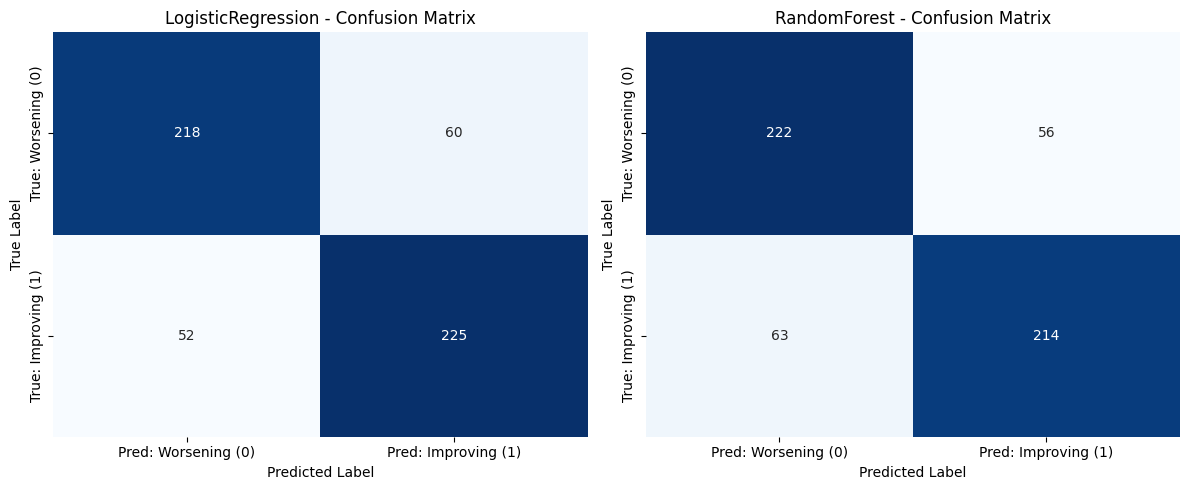

In [17]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,5))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_s)
        cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Pred: Worsening (0)', 'Pred: Improving (1)'],
                yticklabels=['True: Worsening (0)', 'True: Improving (1)'])
    
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

plt.tight_layout()
plt.show()


c:\Users\AISWARYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\AISWARYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
Estimating transforms: 100%|██████████| 1000/1000 [00:00<00:00, 3861.94it/s]


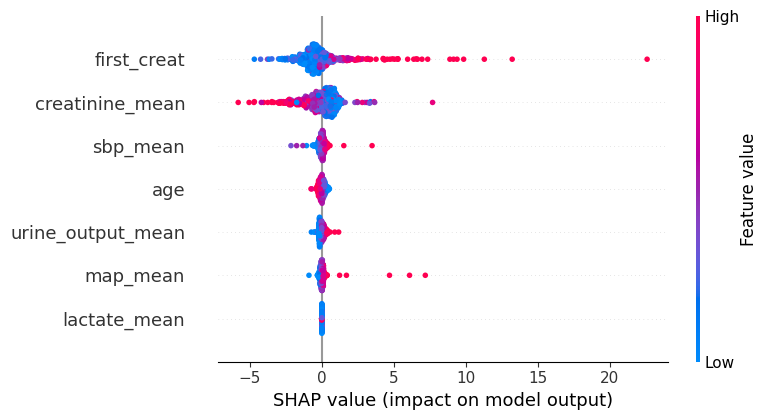

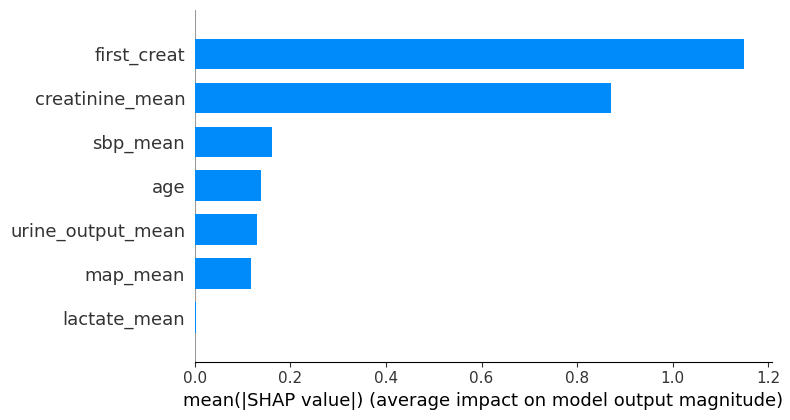

In [18]:
import shap
import numpy as np
lr_model = models['LogisticRegression']
explainer = shap.LinearExplainer(lr_model, X_train_s, feature_perturbation="correlation_dependent")
shap_values = explainer.shap_values(X_test_s)
X_test_df = pd.DataFrame(X_test_s, columns=X.columns)
shap.summary_plot(shap_values, X_test_df, plot_type="dot")
shap.summary_plot(shap_values, X_test_df, plot_type="bar")


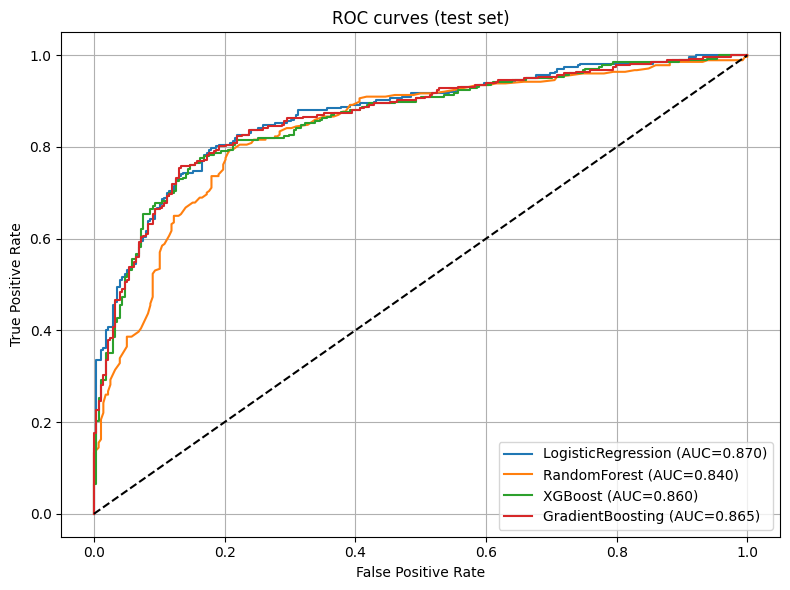

Evaluation metrics on test set:
                    accuracy  precision    recall        f1       auc
model                                                                
LogisticRegression  0.798198   0.789474  0.812274  0.800712  0.870179
RandomForest        0.785586   0.792593  0.772563  0.782450  0.839571
XGBoost             0.807207   0.826923  0.776173  0.800745  0.860439
GradientBoosting    0.803604   0.828125  0.765343  0.795497  0.864712

LogisticRegression classification report:
              precision    recall  f1-score   support

           0     0.8074    0.7842    0.7956       278
           1     0.7895    0.8123    0.8007       277

    accuracy                         0.7982       555
   macro avg     0.7984    0.7982    0.7982       555
weighted avg     0.7985    0.7982    0.7982       555


RandomForest classification report:
              precision    recall  f1-score   support

           0     0.7789    0.7986    0.7886       278
           1     0.7926    0.772

In [14]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric='logloss',
        random_state=42
    ),
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
}
results = []
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_prob = model.decision_function(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    results.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc
    })

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves (test set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results).set_index('model')
print("Evaluation metrics on test set:")
print(results_df)

# Classification Reports
for name, model in models.items():
    y_pred = model.predict(X_test_s)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, digits=4))
